# PREDICTIVE MAINTAINANCE ANALYSIS

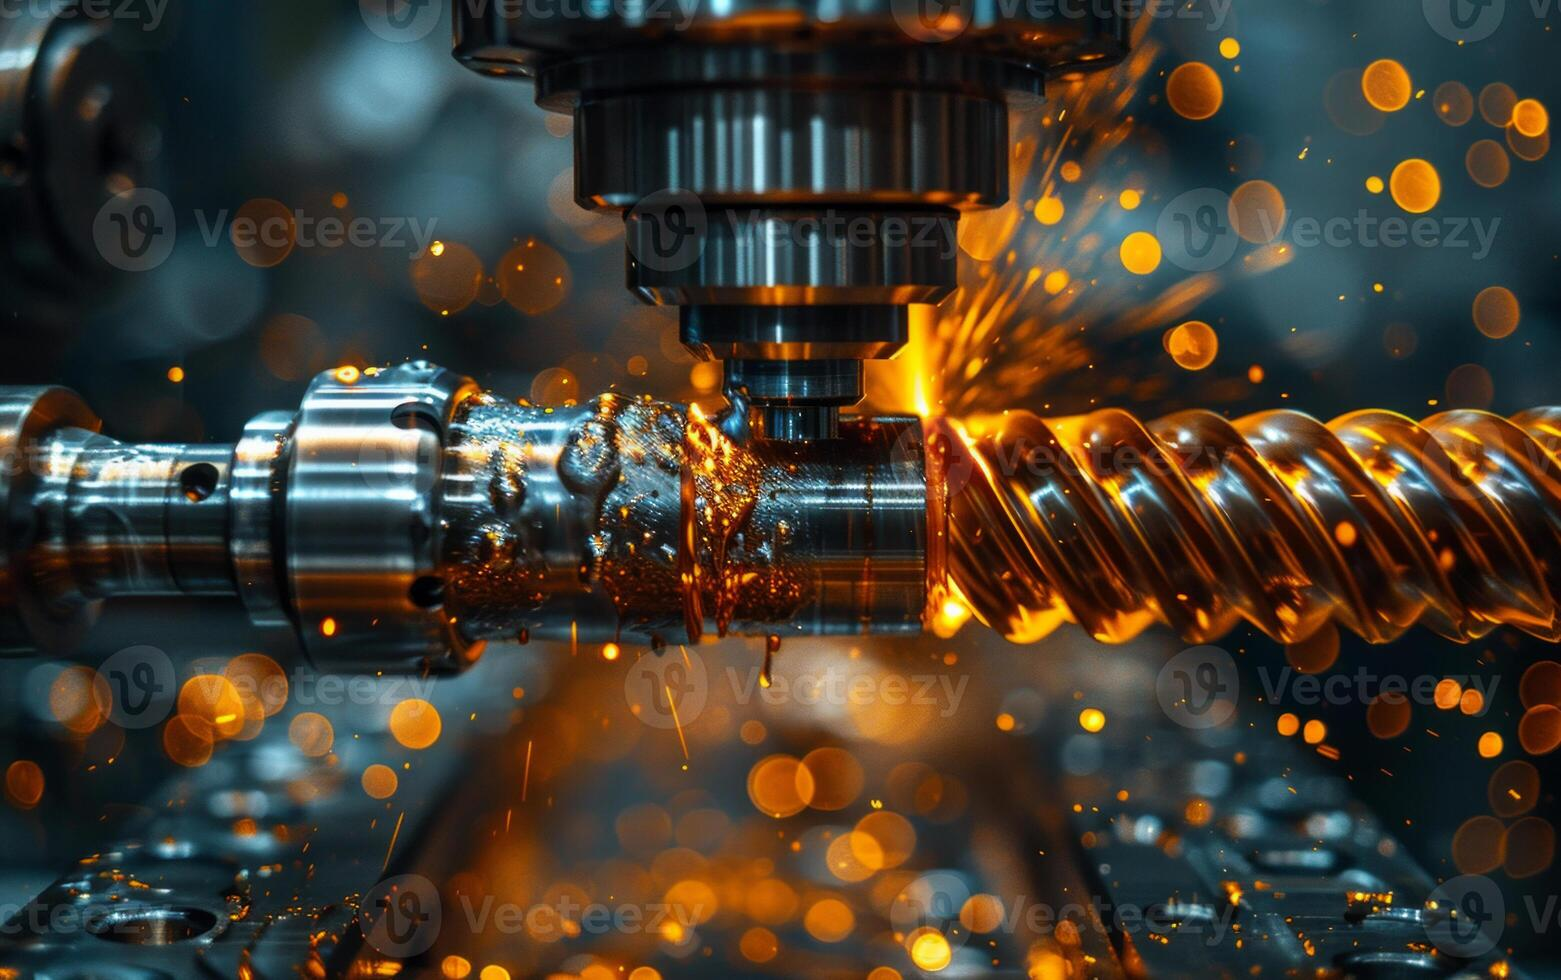

In [2]:
from IPython.display import Image
Image(filename='/Users/adityaanandraogaikwad/Desktop/ML Updated project/Predictive Maintainance/IMG2.jpg',width=1100,height=400)

This project is related to a mechanical industry, Sometimes in industries unexpected machine failures occurs due to improper handling, power cutoff, faulty instrument, improper machine parameters given by operator. By analysing and finding insights from the dataset of drilling tool which is used on lathe machine in mechanical industry we created a model using a machine learning algorithm which predict if machine will get failure or not.

## Future scope - 

- By using this model we can improve the productivity of companies.
- We can easily predict  machine will fail or not before start the production by providing input parameters.
- Prevent the machine from failures.
- Improves the safety features from accidents.

In [5]:
# Import Data Manipulation Library
import numpy as np
import pandas as pd
# Import Data Visualisation Library
import matplotlib.pyplot as plt
import seaborn as sns
# Filter warning Library
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Import the data set using pandas Library
data = pd.read_csv('/Users/adityaanandraogaikwad/Desktop/ML Updated project/Predictive Maintainance/predictive_maintenance.csv')
df = data.sample(frac=1)
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
4239,4240,L51419,L,302.3,311.0,1446,37.6,75,0,No Failure
9333,9334,L56513,L,298.5,309.0,1450,40.5,199,0,No Failure
239,240,L47419,L,298.0,308.2,1611,30.6,195,0,No Failure
9962,9963,L57142,L,298.2,307.9,1429,49.4,141,0,No Failure
4738,4739,M19598,M,303.2,311.4,2102,19.0,5,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9268,9269,L56448,L,298.2,308.8,1666,31.5,30,0,No Failure
241,242,L47421,L,298.0,308.1,1777,24.3,200,0,No Failure
7314,7315,L54494,L,299.9,310.3,1268,53.3,146,0,No Failure
3956,3957,M18816,M,302.3,311.4,1500,40.2,30,0,No Failure


## Data Discription

In [8]:
from IPython.display import Image
Image(filename='/Users/adityaanandraogaikwad/Desktop/ML Updated project/Predictive Maintainance/IMG1.jpg',width=1100,height=450)

 - After looking at the dataset, we can assume that the data is about the drilling tool used in a lathe machine.

 - The columns consist values of:
     1. Air temperature in Kelvin (K)
     2. Process temperature in Kelvin (K)
     3. Rotational speed in Rotation per minute (RPM)
     4. Torque in Newton meters (Nm)
     5. Tool wear in minutes (min)


 - Type column is given to represent the type of product with respect to its quality. 
   L, M and H are for Low, Medium and High quality products respectively.

 - ProductID consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a    variant-specific serial number.

 - The target column is the output of machine, if it is failing or not.
   0 represents no failure whereas 1 represents that failure has occured.

 - An additional column of Failure Type is given so that we can understand what type of failure is occuring.

In [10]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 4239 to 4399
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 859.4+ KB


- The data contain no null values and also having categorical columns.

In [11]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


- From the above distribution we can get know the data is normally distributed 
- because the value of mean and median(50%) is close to each other so there is no need to skewness removal.

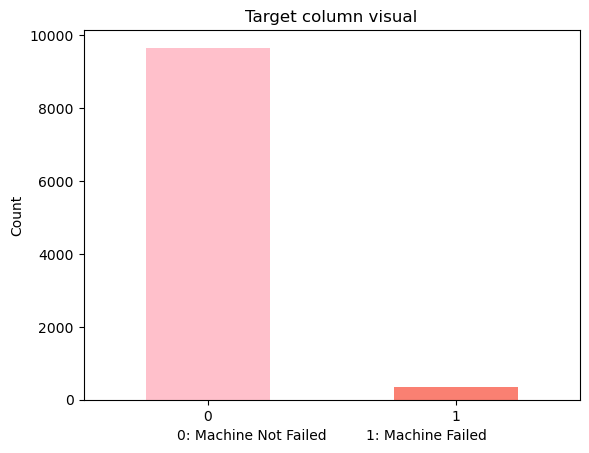

Target
0    9661
1     339
Name: count, dtype: int64

In [13]:
df['Target'].value_counts().plot(kind='bar',color=['Pink','salmon'])
plt.title('Target column visual')
plt.xlabel('0: Machine Not Failed         1: Machine Failed')
plt.ylabel('Count')
plt.xticks(rotation=1)
plt.show()
df['Target'].value_counts() 

- we can see that the the ratio of machine failure is less than as compare to no failure and so there is imbalance in two columns.

In [15]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

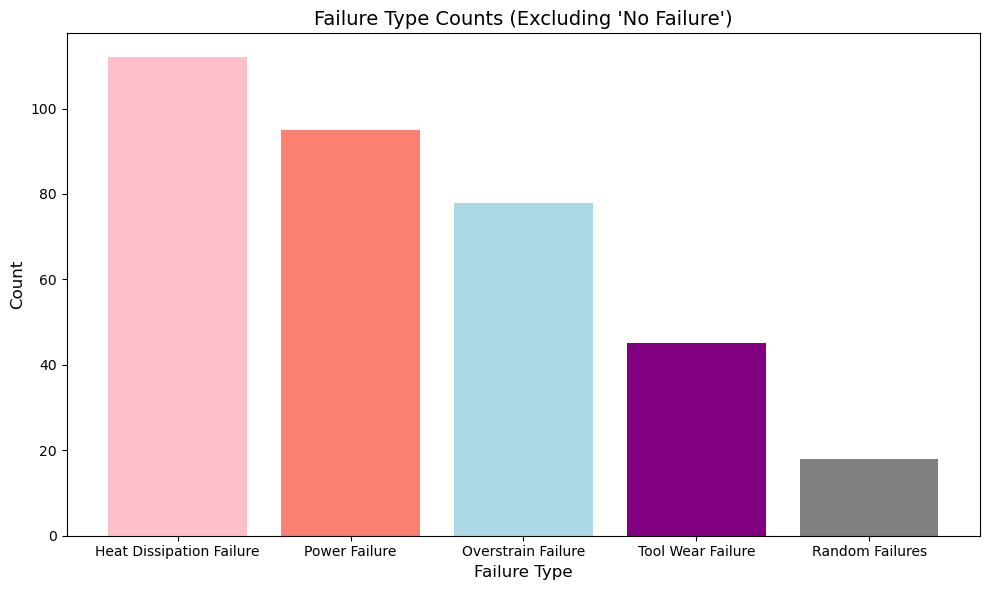

In [16]:
# Creating new dictionary to plot failure type on a bar plot

data = { 'Failed_type': ['Heat Dissipation Failure','Power Failure','Overstrain Failure','Tool Wear Failure','Random Failures'],
         'Counts': [112,95,78,45,18] }
data = pd.DataFrame(data)

plt.figure(figsize=(10,6))
plt.bar(data['Failed_type'],data['Counts'],color=['Pink','salmon','lightblue','purple','gray'])
plt.xlabel("Failure Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Failure Type Counts (Excluding 'No Failure')", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

 - Here we can see the types of failures such as:

 - Heat Dissipation Failure : The failure that occurs due to overheating of the tool.
 - Power Failure : The failure occuring due to power cutout.
 - Overstrain Failure : Failure because of excessive strain on the tool.
 - Tool Wear Failure : Failure due to tool wear and tear that happens after excessive use of tool.
 - Random Failures : Random Failures can be any failure whose cause can't be assessed or any human error.

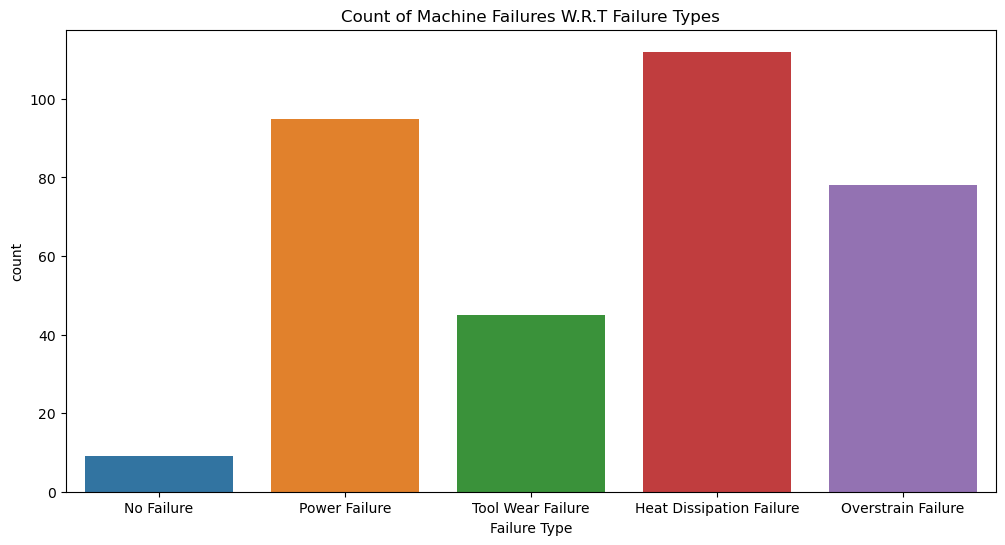

In [18]:
plt.figure(figsize = (12,6))
sns.countplot(data = df[df['Target'] == 1], x = "Failure Type")
plt.title("Count of Machine Failures W.R.T Failure Types")
plt.show()

 - In the above countplot we can see that "No Failure" is also plotted but that does not makes any sense. 
 - This means there are some fake values in the data. 
 - So we need to eliminate them.

In [20]:
df[(df['Target']== 1) & (df['Failure Type']== "No Failure")]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
6478,6479,L53658,L,300.5,309.8,1663,29.1,145,1,No Failure
2749,2750,M17609,M,299.7,309.2,1685,28.9,179,1,No Failure
5941,5942,L53121,L,300.6,310.7,1438,48.5,78,1,No Failure
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1,No Failure
8506,8507,L55686,L,298.4,309.6,1710,27.3,163,1,No Failure
4044,4045,M18904,M,301.9,310.9,1419,47.7,20,1,No Failure
1437,1438,H30851,H,298.8,309.9,1439,45.2,40,1,No Failure
9015,9016,L56195,L,297.2,308.1,1431,49.7,210,1,No Failure
5536,5537,M20396,M,302.3,311.8,1363,54.0,119,1,No Failure


In [21]:
i = df[(df['Target']== 1) & (df['Failure Type']== "No Failure")].index
df.drop(i,axis=0,inplace=True) 

In [22]:
# Also, we cannot see anything related to Random Failures since they cannot be assesed. So we will drop the products with Random failures.

In [23]:
i = df[(df['Target']== 0) & (df['Failure Type']== "Random Failures")]
i

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,0,Random Failures
5639,5640,L52819,L,302.6,312.1,1668,28.7,180,0,Random Failures
5509,5510,L52689,L,302.8,312.2,1509,36.5,52,0,Random Failures
3065,3066,M17925,M,300.1,309.2,1687,27.7,95,0,Random Failures
7868,7869,H37282,H,300.4,311.9,1438,46.7,41,0,Random Failures
6960,6961,L54140,L,300.7,311.0,1413,52.0,91,0,Random Failures
5553,5554,L52733,L,302.5,311.9,1306,59.7,172,0,Random Failures
2072,2073,L49252,L,299.6,309.5,1570,35.5,189,0,Random Failures
1302,1303,L48482,L,298.6,309.8,1505,45.7,144,0,Random Failures
5489,5490,L52669,L,302.6,312.1,1499,35.0,215,0,Random Failures


In [24]:
i = df[(df['Target']== 0) & (df['Failure Type']== "Random Failures")].index
df.drop(i,axis=0,inplace=True)

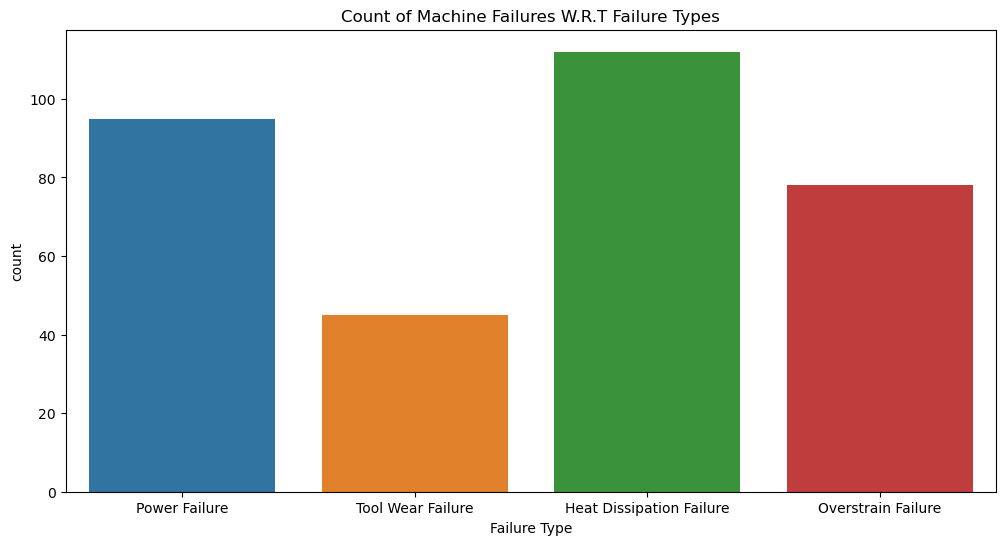

In [25]:
plt.figure(figsize = (12,6))
sns.countplot(data = df[df['Target'] == 1], x = "Failure Type")
plt.title("Count of Machine Failures W.R.T Failure Types")
plt.show()

 - From above graph we can see most of time our machine get failed due to Heat Dissipation Failure and after that Power Failure 
 - then Overstrain Failure and last Tool Wear Failure.

<Axes: title={'center': 'Percentage of Product Type'}, ylabel='count'>

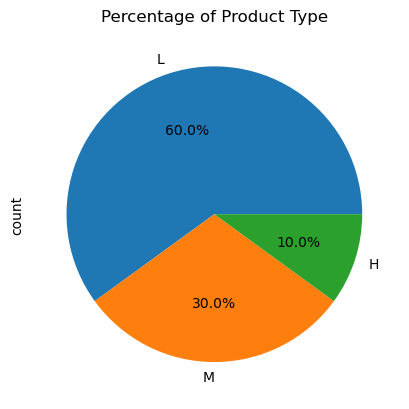

In [27]:
df['Type'].value_counts().plot(kind='pie',autopct='%.1f%%',title="Percentage of Product Type")

- From our total products 60% are low quality products and 30% are medium quality products then 10% are high quality products.

In [29]:
pd.DataFrame(df['Type'].value_counts())

,count
Type,
L,5984
M,2991
H,998


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 4239 to 4399
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      9973 non-null   int64  
 1   Product ID               9973 non-null   object 
 2   Type                     9973 non-null   object 
 3   Air temperature [K]      9973 non-null   float64
 4   Process temperature [K]  9973 non-null   float64
 5   Rotational speed [rpm]   9973 non-null   int64  
 6   Torque [Nm]              9973 non-null   float64
 7   Tool wear [min]          9973 non-null   int64  
 8   Target                   9973 non-null   int64  
 9   Failure Type             9973 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 857.1+ KB


In [31]:
num_colunms = df.select_dtypes([int,float])
num_colunms.columns

Index(['UDI', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')

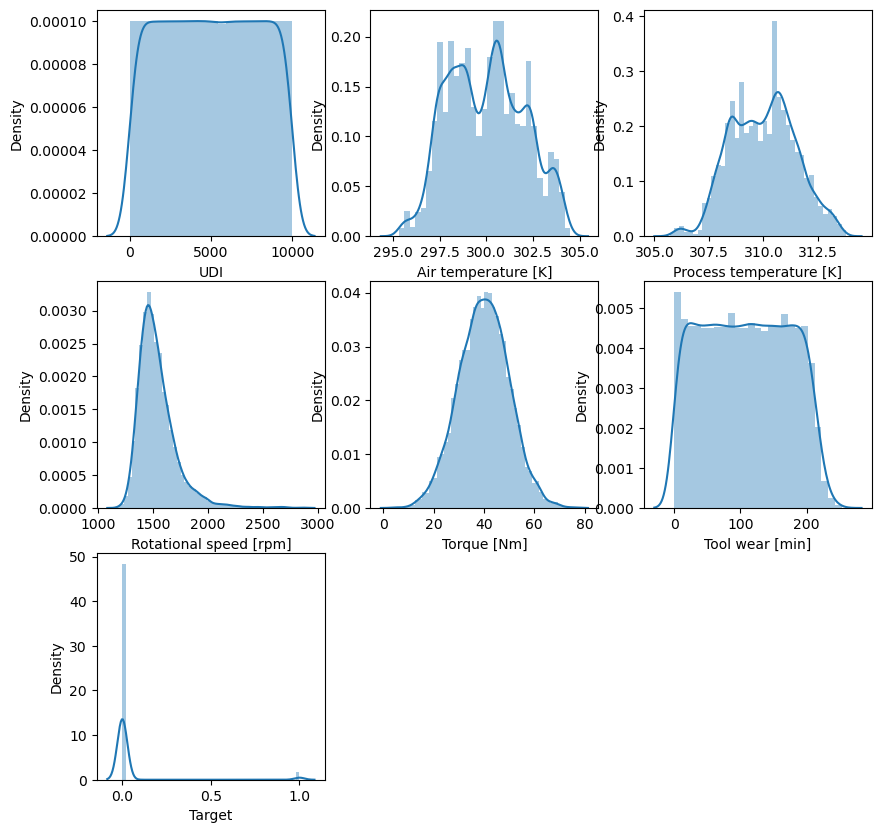

In [32]:
# Now we can see how the data is distributed
plt.figure(figsize=(10,10))
plot = 0
for i in num_colunms:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.distplot(df[i])
plt.show()

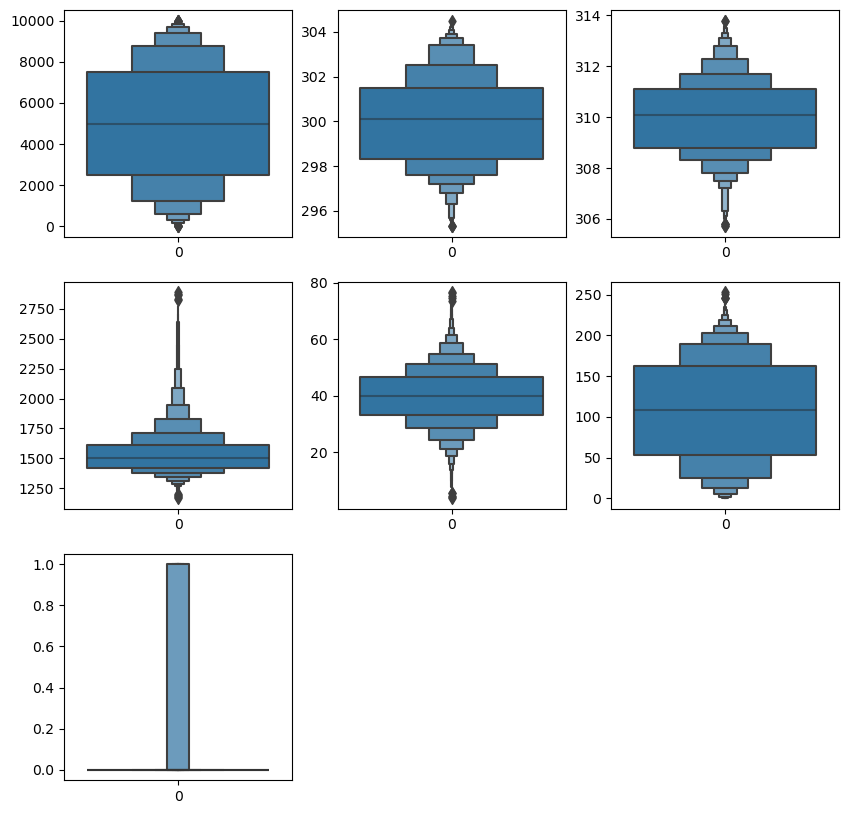

In [33]:
# And also we can see the data has no outliers
plt.figure(figsize=(10,10))
plot = 0
for i in num_colunms:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.boxenplot(df[i])
plt.show()

<Axes: >

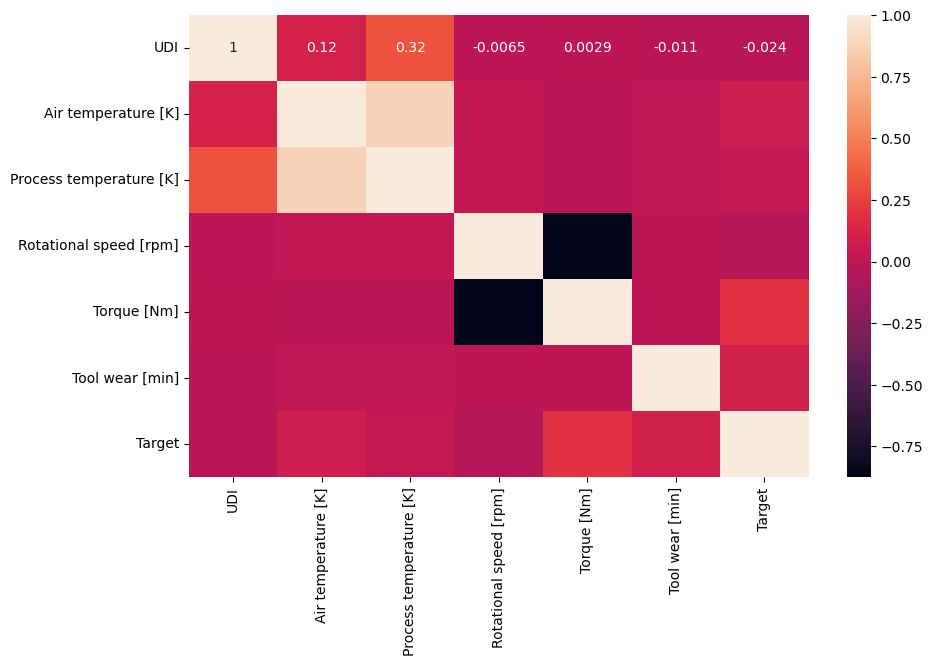

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap((df.select_dtypes([int,float]).corr()),annot=True)

- From above heatmap, we can see that there is no correlation between any two columns.

In [36]:
# Droping the unnecessary columns that we dont require 
df.drop(['UDI','Product ID','Failure Type'],axis=1,inplace=True)

In [37]:
# To see the correlation of columns with target column we plotting a line plot

In [38]:
features = df.drop(columns=['Target'],axis=1)
features.sample(2)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
1516,L,298.2,308.9,1278,54.0,18
5550,M,302.3,311.9,1508,42.3,159


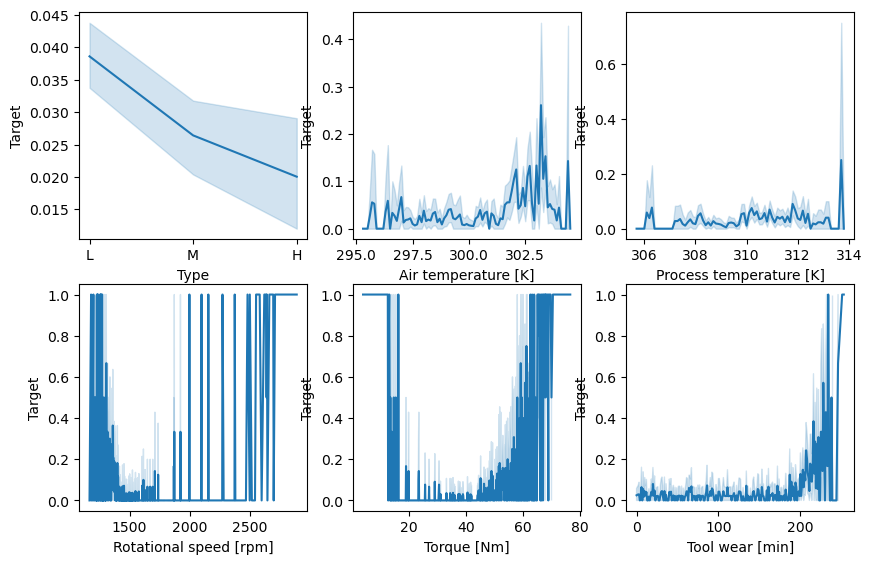

In [39]:
plt.figure(figsize=(10,10))
plot = 0
for i in features:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.lineplot(x=features[i],y=df['Target'])
plt.show()

- Here we can see that Rotational speed [rpm], Torque [Nm], Tool wear [min] are highly affecting our Target column

In [41]:
df.sample(2)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
4082,L,302.0,310.4,1568,39.2,112,0
6115,L,300.8,310.9,1457,47.7,82,0


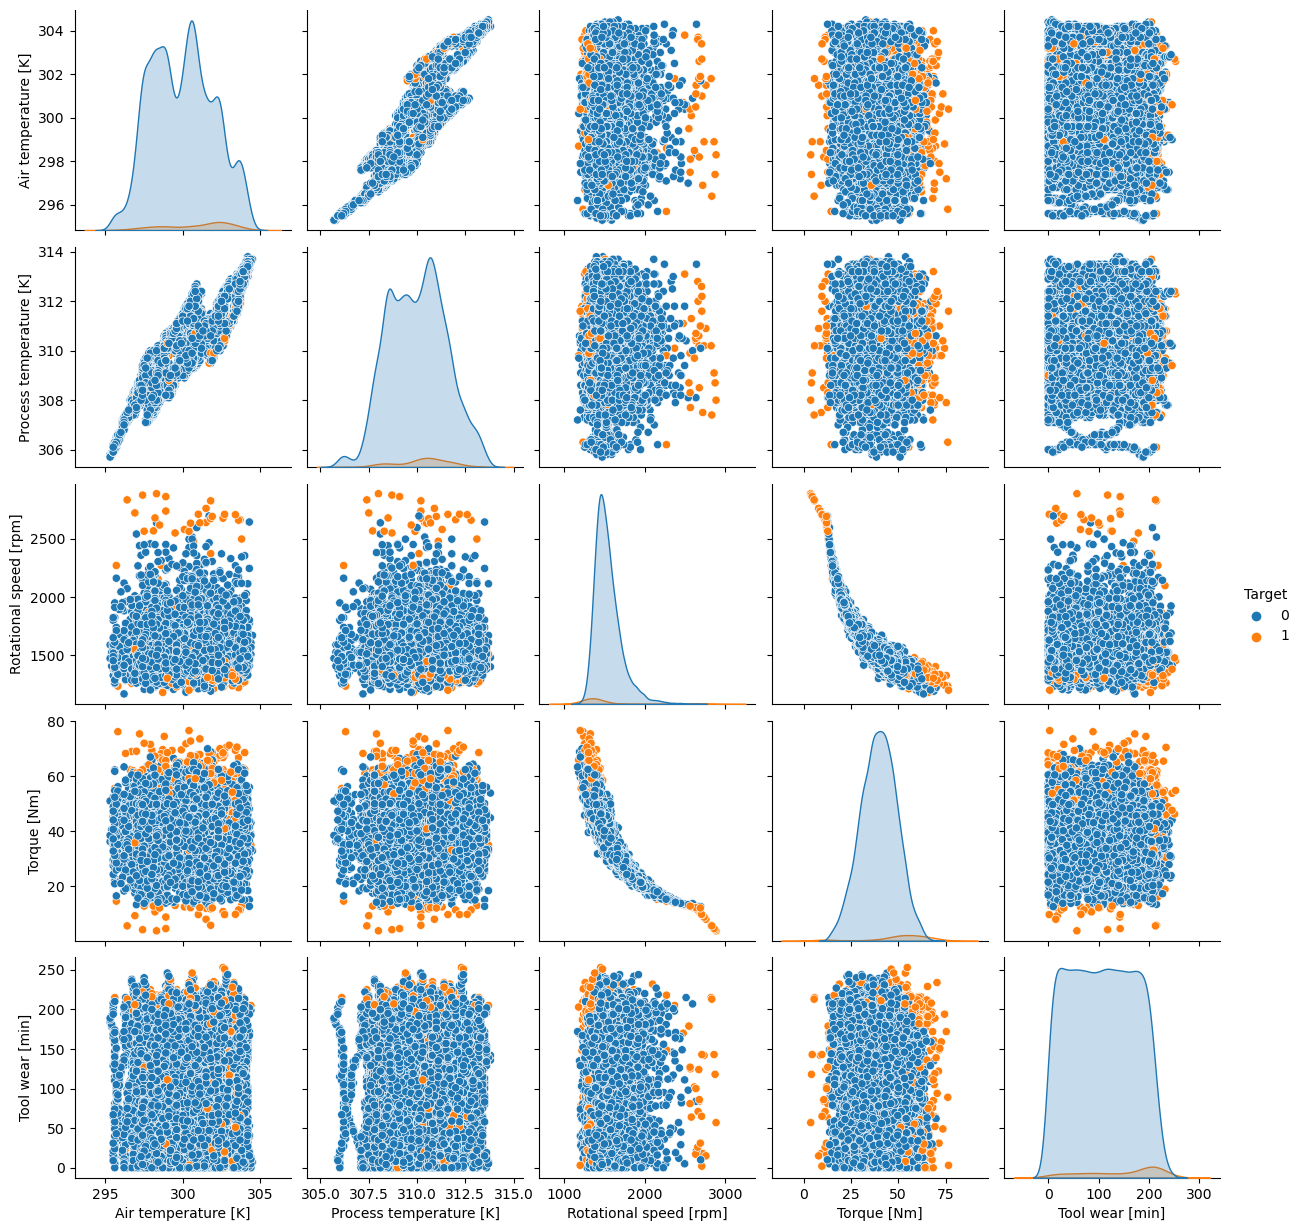

In [42]:
sns.pairplot(df,hue='Target')

In [43]:
# Handle categorical column
df['Type'].unique()

array(['L', 'M', 'H'], dtype=object)

In [44]:
# Replacing the categories with integers
df['Type'] = df['Type'].replace("L",0)
df['Type'] = df['Type'].replace("M",1)
df['Type'] = df['Type'].replace("H",2)

In [45]:
df.sample(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
6096,1,300.8,310.7,1483,40.8,28,0
6799,1,301.1,310.7,2636,12.2,100,1
6587,1,301.6,310.7,1813,24.6,210,0
7264,1,300.4,310.6,1448,44.9,21,0
8980,0,297.0,307.6,1513,42.4,124,0


## Splitting the Data into Features and Target

In [47]:
X = df.drop(columns='Target')
y = df['Target']

## Splitting the Data into Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

from sklearn.metrics import classification_report,accuracy_score,mean_squared_error,mean_absolute_error

In [51]:
def mymodel(model):
    model.fit(Xtrain,ytrain)
    ypred = model.predict(Xtest)
    print(classification_report(ytest,ypred))
    print('Mean Absolute Error: ',mean_absolute_error(ytest,ypred))
    print('Mean Squared Error: ',mean_squared_error(ytest,ypred))
    return model   

- Here we created a function to check which Machine Learning Algorithm will be the best fit for our model. 
- We will select the one with highest accuracy.

### LogisticRegression()

In [54]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2902
           1       0.61      0.22      0.33        90

    accuracy                           0.97      2992
   macro avg       0.79      0.61      0.66      2992
weighted avg       0.97      0.97      0.97      2992

Mean Absolute Error:  0.027740641711229946
Mean Squared Error:  0.027740641711229946


LogisticRegression()

### KNeighborsClassifier

In [56]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2902
           1       0.56      0.20      0.30        90

    accuracy                           0.97      2992
   macro avg       0.77      0.60      0.64      2992
weighted avg       0.96      0.97      0.96      2992

Mean Absolute Error:  0.02874331550802139
Mean Squared Error:  0.02874331550802139


KNeighborsClassifier()

### DecisionTreeClassifier

In [58]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2902
           1       0.62      0.68      0.65        90

    accuracy                           0.98      2992
   macro avg       0.80      0.83      0.82      2992
weighted avg       0.98      0.98      0.98      2992

Mean Absolute Error:  0.022393048128342245
Mean Squared Error:  0.022393048128342245


DecisionTreeClassifier()

- We can see that Decision Tree Classifier is best suited for our model since it has the highest accuracy of all.

In [60]:
print(dt.score(Xtrain,ytrain))
print(dt.score(Xtest,ytest))

1.0
0.9776069518716578


- Our training and testing scores are a little different from each other. But we need scores close to each other for our model to work best.

### Hyperparameter Tuning

In [166]:
for i in range(1,51):
    dt1 = DecisionTreeClassifier(max_depth=i )
    dt1.fit(Xtrain,ytrain)
    ypred = dt1.predict(Xtest)
    print(f"{i} = {accuracy_score(ytest,ypred)}")

1 = 0.9725935828877005
2 = 0.9749331550802139
3 = 0.9749331550802139
4 = 0.9752673796791443
5 = 0.9769385026737968
6 = 0.9752673796791443
7 = 0.9789438502673797
8 = 0.981951871657754
9 = 0.9829545454545454
10 = 0.9832887700534759
11 = 0.9832887700534759
12 = 0.9829545454545454
13 = 0.981951871657754
14 = 0.9792780748663101
15 = 0.9802807486631016
16 = 0.9792780748663101
17 = 0.9796122994652406
18 = 0.9769385026737968
19 = 0.9776069518716578
20 = 0.9786096256684492
21 = 0.9792780748663101
22 = 0.9789438502673797
23 = 0.9779411764705882
24 = 0.9776069518716578
25 = 0.9782754010695187
26 = 0.9772727272727273
27 = 0.9776069518716578
28 = 0.9776069518716578
29 = 0.9792780748663101
30 = 0.9766042780748663
31 = 0.9786096256684492
32 = 0.9769385026737968
33 = 0.9779411764705882
34 = 0.9782754010695187
35 = 0.9772727272727273
36 = 0.9766042780748663
37 = 0.9779411764705882
38 = 0.9772727272727273
39 = 0.9776069518716578
40 = 0.9786096256684492
41 = 0.9786096256684492
42 = 0.9779411764705882
43 

- Here, the maximum accuracy is on index 8, so we will select max_depth = 8

In [65]:
for i in range(2,51):
    dt2 = DecisionTreeClassifier(min_samples_split=i)
    dt2.fit(Xtrain,ytrain)
    ypred = dt2.predict(Xtest)
    print(f"{i} = {accuracy_score(ytest,ypred)}")

2 = 0.9776069518716578
3 = 0.9786096256684492
4 = 0.9792780748663101
5 = 0.9786096256684492
6 = 0.9789438502673797
7 = 0.9799465240641712
8 = 0.9799465240641712
9 = 0.9809491978609626
10 = 0.9809491978609626
11 = 0.981951871657754
12 = 0.981951871657754
13 = 0.9802807486631016
14 = 0.9802807486631016
15 = 0.9802807486631016
16 = 0.9802807486631016
17 = 0.9802807486631016
18 = 0.9806149732620321
19 = 0.9806149732620321
20 = 0.9806149732620321
21 = 0.9806149732620321
22 = 0.9806149732620321
23 = 0.9806149732620321
24 = 0.9802807486631016
25 = 0.9806149732620321
26 = 0.9806149732620321
27 = 0.9806149732620321
28 = 0.9806149732620321
29 = 0.9806149732620321
30 = 0.9806149732620321
31 = 0.9806149732620321
32 = 0.9806149732620321
33 = 0.9766042780748663
34 = 0.9766042780748663
35 = 0.9766042780748663
36 = 0.9766042780748663
37 = 0.9766042780748663
38 = 0.9766042780748663
39 = 0.9766042780748663
40 = 0.9766042780748663
41 = 0.9766042780748663
42 = 0.9766042780748663
43 = 0.9766042780748663
44

- Here, the maximum accuracy is on index 34 becauase after 34 the value is dropping, so we select min_samples_split = 34

for i in range(2,51):
    dt2 = DecisionTreeClassifier(min_samples_leaf=i)
    dt2.fit(Xtrain,ytrain)
    ypred = dt2.predict(Xtest)
    print(f"{i} = {accuracy_score(ytest,ypred)}")

- Here, the maximum accuracy is on index 12, so we will select min_samples_leaf = 12

In [69]:
Final_model = DecisionTreeClassifier(max_depth=7,min_samples_leaf=12,min_samples_split=34)
mymodel(Final_model)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2902
           1       0.64      0.51      0.57        90

    accuracy                           0.98      2992
   macro avg       0.81      0.75      0.78      2992
weighted avg       0.97      0.98      0.98      2992

Mean Absolute Error:  0.02339572192513369
Mean Squared Error:  0.02339572192513369


DecisionTreeClassifier(max_depth=7, min_samples_leaf=12, min_samples_split=34)

- The values for tunners Final_model = DecisionTreeClassifier(max_depth=7,min_samples_leaf=12,min_samples_split=34)

In [71]:
print(Final_model.score(Xtrain,ytrain))
print(Final_model.score(Xtest,ytest))

0.984959174903309
0.9766042780748663


- Now, we are getting both training and testing scores almost equal.

In [73]:
X.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [74]:
# Creating a function to test the model
def modeltest():
    Type = int(input("Enter type of product based on quality.\nIf Low, enter 0.\nIf Medium, enter 1.\nIf High, enter 2.\nYou entered : "))
    Air_temp = eval(input("Enter Air Temperature in K : "))
    Process_temp = eval(input("Enter Process Temperature in K : "))
    Rotational_speed = int(input("Enter Rotational Speed in RPM : "))
    Torque = eval(input("Enter Torque in Nm : "))
    Tool_wear = int(input("Enter Tool Wear in min : "))
    Temp_difference = Process_temp-Air_temp

    newx = [Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear]
    yp = Final_model.predict([newx])[0]

    if yp == 1:
        print("Output: Machine is Failed")
        return yp
    else:
        print("Output: Machine is not Failed")
        return yp    

- In order to check if our model is working properly or not, we need to test it.
- Here we have some existing values of the given parameters for testing failure.

## Model testing

### Testing if our model is properly working or not.

Example:-

- Type = M
- Air temperature [K] = 298.2
- Process temperature [K] = 308.5
- Rotational speed [rpm] = 2678
- Torque [Nm] = 10.7
- Tool wear [min] = 86
- Target = 1

## Here the machine should fail.

In [80]:
# modeltest()

Example:-

- Type = H
- Air temperature [K] = 298.4
- Process temperature [K] = 308.9
- Rotational speed [rpm] = 1782
- Torque [Nm] = 23.9
- Tool wear [min] = 24
- Target = 0

### Here the machine should not fail.

In [83]:
# modeltest()

Since the outcome is correct our model is successful

# Prescriptive Analysis

After studying the dataset, we can see that machine failure is mainly occuring because of 3 reasons:
- Improper rotational speed of the spindle.
- Torque not maintained as perf the requirement.
- High tool wear.

- Air temperature and Process temperature are not playing any major role in machine failure.
- Low quality products are more likely to fail compared to medium quality and high quality products.
- Heat dissipation failure is the most occuring failure which causes due to overheating of the tool.
- Power failure is also a major problem causing machine failure.

- Measures to take in order to avoid failure.

   1. User must set the rotational speed properly. Not too high and also not too low.
   2. User should not set the torque too high or too low. Torque should be set as per the tool requirement.
   3. User should not use the same tool for long period of time. Since tools may wear due to excessive usage.
   4. High quality and medium quality products should be used more frequently.
   5. Overheating of tool must be avoided by constantly providing coolant to the tool. 
   6. Secondary power input shoould be provided in case of power failure